In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('pre_processed_data.csv')

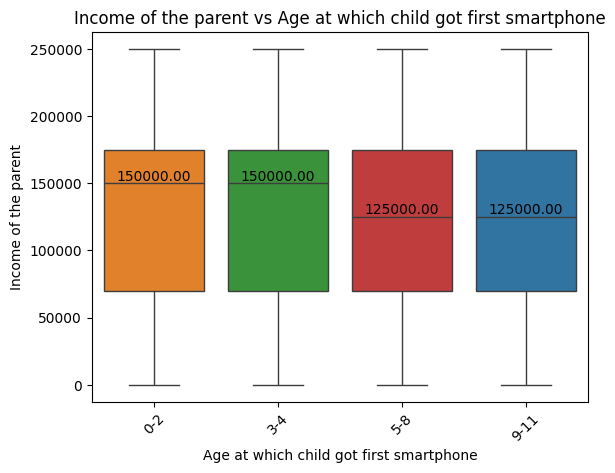

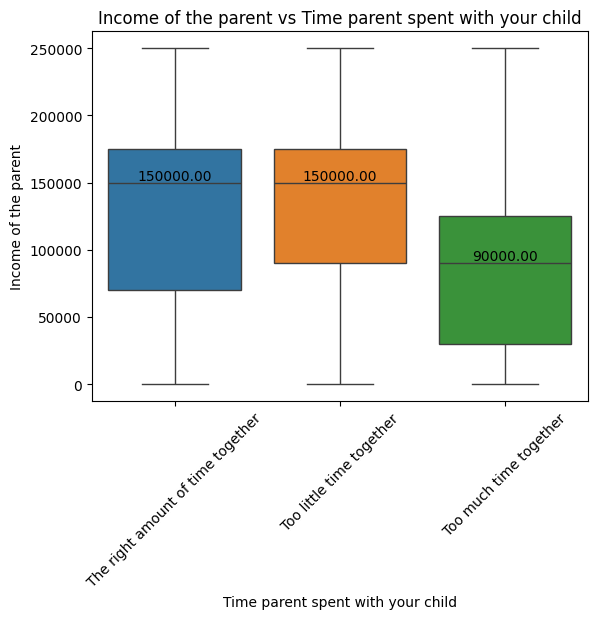

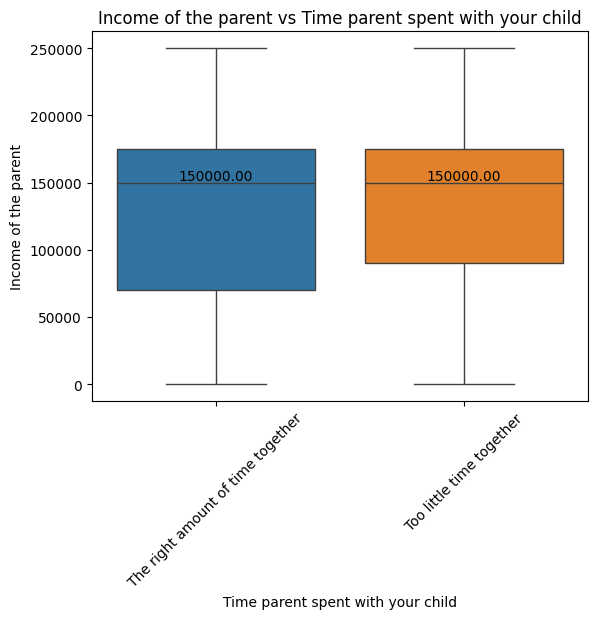

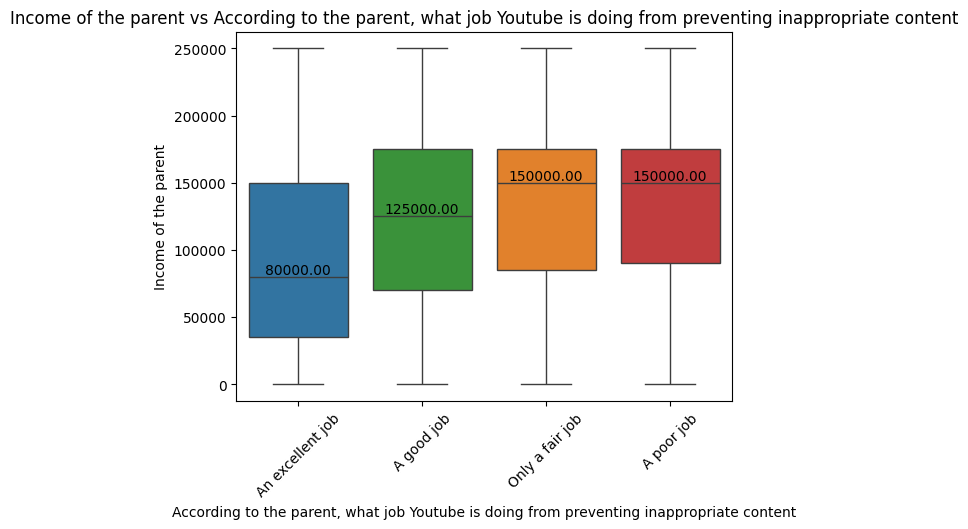

In [55]:
import seaborn as sns
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_boxplot(data, column1, column2, column1_name, column2_name):
    """
    Plot a boxplot using Seaborn for given columns.

    Parameters:
    - data: DataFrame containing the data
    - column1: Name of the column for the y-axis
    - column2: Name of the column for the x-axis
    - column1_name: Label for the y-axis
    - column2_name: Label for the x-axis

    Returns:
    Displays the boxplot
    """

    filtered_df = data[(data[column1] != 'Refused') & (data[column2] != 'Refused')]
    filtered_df = filtered_df[~filtered_df[column2].isnull()]
    sorted_values = filtered_df[column2].sort_values().unique()

    if column2 == 'YT_preventing_inappropriate':
        sorted_values = [
            "An excellent job",
            "A good job",
            "Only a fair job",
            "A poor job"
        ]

    sns.boxplot(y=column1, x=column2, data=filtered_df, hue=column2, legend=False, order=sorted_values)
    for i, box in enumerate(sorted_values):
        vals = filtered_df[filtered_df[column2] == box][column1]
        median_val = vals.median()
        plt.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', fontdict={'fontsize': 10})
    plt.ylabel(column1_name)
    plt.xlabel(column2_name)
    plt.xticks(rotation=45)
    plt.title(f'{column1_name} vs {column2_name}')
    plt.savefig(f'{column1_name}_vs_{column2_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_boxplot(data, 'P_income', 'Child_first_age_smartphone','Income of the parent','Age at which child got first smartphone')
plot_boxplot(data, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent spent with your child')
filtered_df = data[(data['P_income'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Too much time together')]
plot_boxplot(filtered_df, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent spent with your child')
plot_boxplot(data, 'P_income', 'YT_preventing_inappropriate','Income of the parent','According to the parent, what job Youtube is doing from preventing inappropriate content')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


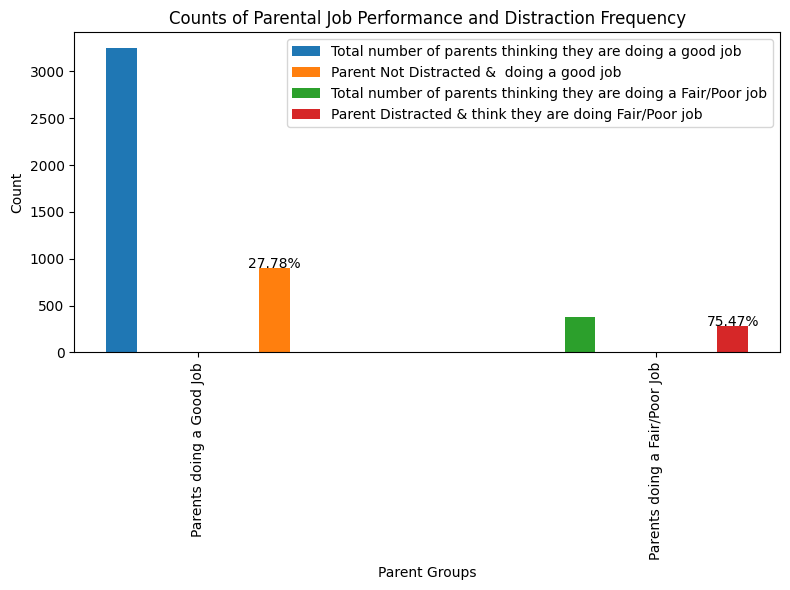

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_job_performance_and_distraction(data):
    """
    Plot the counts of parental job performance and distraction frequency.

    Parameters:
    - data: DataFrame containing columns 'How_often_distracted' and 'Time_spent_together'

    Returns:
    displays the plot
    """
  
    condition_total_good = data[data['Time_spent_together'].isin(['A very good job', 'A good job'])]
    condition_distracted_good = condition_total_good[condition_total_good['How_often_distracted'].isin(['Rarely', 'Never'])]

    condition_total_fair_poor = data[data['Time_spent_together'].isin(['Only a fair job', 'A poor job'])]
    condition_distracted_fair_poor = condition_total_fair_poor[condition_total_fair_poor['How_often_distracted'].isin(['Often', 'Sometimes'])]

    count_total_good = condition_total_good.shape[0]
    count_distracted_good = condition_distracted_good.shape[0]

    count_total_fair_poor = condition_total_fair_poor.shape[0]
    count_distracted_fair_poor = condition_distracted_fair_poor.shape[0]

    percent_distracted_good = count_distracted_good / condition_total_good.shape[0] * 100
    percent_distracted_fair_poor = count_distracted_fair_poor / condition_total_fair_poor.shape[0] * 100

    plt.figure(figsize=(8, 6))

    bar_width = 0.2
    index = [1, 2, 4, 5]
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.bar(index[0], count_total_good, bar_width, label='Total number of parents thinking they are doing a good job')
    plt.bar(index[1], count_distracted_good, bar_width, label='Parent Not Distracted &  doing a good job')
    plt.bar(index[2], count_total_fair_poor, bar_width, label='Total number of parents thinking they are doing a Fair/Poor job')
    plt.bar(index[3], count_distracted_fair_poor, bar_width, label='Parent Distracted & think they are doing Fair/Poor job')
    

    plt.text(index[1], count_distracted_good + 0.05, f'{percent_distracted_good:.2f}%', ha='center')
    plt.text(index[3], count_distracted_fair_poor + 0.05, f'{percent_distracted_fair_poor:.2f}%', ha='center')

    plt.xlabel('Parent Groups')
    plt.ylabel('Count')
    plt.title('Counts of Parental Job Performance and Distraction Frequency')
    plt.xticks([1.5, 4.5], ['Parents doing a Good Job', 'Parents doing a Fair/Poor Job'],rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_job_performance_and_distraction(data)